In [46]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import griddata


In [47]:

onedrive_path = "/Users/kelseypenners/Library/CloudStorage/OneDrive-TUEindhoven/Li, Muyao's files - 5ARIP10 shared data"
files = os.listdir(onedrive_path)

data_dir = os.path.join(onedrive_path, "Experimental data/composite plate")
files = os.listdir(data_dir)

npy_path = os.path.join(data_dir, files[0])
data = np.load(npy_path)
print("composite plate npy shape: ", data.shape)

composite plate npy shape:  (1442, 307200)


In [48]:
# load simulation square numpy file
path = "./"
files = os.listdir(path)

npy_path = os.path.join(path, "simulation_square.npy")
data = np.load(npy_path)
print("muyao's simualation square npy shape: ", data.shape)

muyao's simualation square npy shape:  (200, 225000)


In [49]:
# load MATLAB simulation data csv
simulation_data = pd.read_csv(os.path.join(path, "SimulationModel/results.csv"))
print("simulation data shape: ", simulation_data.shape)
print("simulation data columns: ", list(simulation_data.columns))

simulation data shape:  (8641, 9)
simulation data columns:  ['Node_ID', 'X', 'Y', 'T_0', 'T_2', 'T_4', 'T_6', 'T_8', 'T_10']


In [50]:
# extract coordinates and temperatures
x = simulation_data['X'].values  # x-coordinates of nodes
y = simulation_data['Y'].values  # t-coordinates of nodes
temperatures = simulation_data.iloc[:, 3:].values  # temperature of nodes

print(f"loaded Data: {x.shape}, {y.shape}, {temperatures.shape} ")
print("num time steps: ", temperatures.shape[1])

loaded Data: (8641,), (8641,), (8641, 6) 
num time steps:  6


Text(0.5, 1.0, 'Simulation nodes')

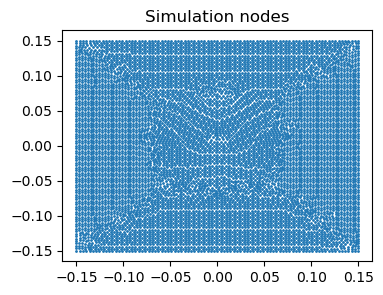

In [51]:
# plot simulation nodes
plt.figure(figsize=(4, 3))
plt.scatter(x, y, s=1) 
plt.title("Simulation nodes")

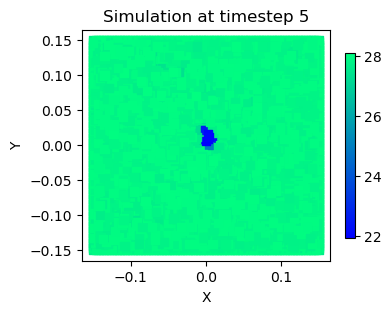

In [52]:

timestep = 5 # choose specific timeframe
temp_at_timestep = temperatures[:, timestep]  # Get temperature values for the chosen frame

# plot the raw scattered data
plt.figure(figsize=(4, 3))
sc = plt.scatter(x, y, c=temp_at_timestep, cmap='winter', marker='s')
plt.colorbar(sc, shrink=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Simulation at timestep {timestep}")
plt.show()

In [53]:
# create meshgrid for pixel data
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 640),
    np.linspace(y.min(), y.max(), 480)
)

# initialize pixel grid for temperatures
grid_temperatures = np.zeros((grid_x.shape[0], grid_x.shape[1], temperatures.shape[1]))

# interpolate temperatures for each time step
for i in range(temperatures.shape[1]):
    grid_temperatures [:,:,i] = griddata(
    points=(x, y), # input coordinates
    values=temperatures[:,i], # temperatures at input coordinates
    xi=(grid_x, grid_y), # grid coordinates for interpolation
    method='nearest'  
    )

print("Interpolated Temperatures: ", grid_temperatures.shape)

Interpolated Temperatures:  (480, 640, 6)


In [54]:
# transpose to make time axis the first dimension
grid_temperatures_transposed = np.transpose(grid_temperatures, (2, 0, 1))  # Shape: (6, 480, 640)

# flatten the grid to have shape (time steps, 307200)
flattened_temperatures = grid_temperatures_transposed.reshape(6, -1)  # Shape: (6, 307200)

print("Final Shape: ", flattened_temperatures.shape)  # should be (num time steps, 307200)

Final Shape:  (6, 307200)


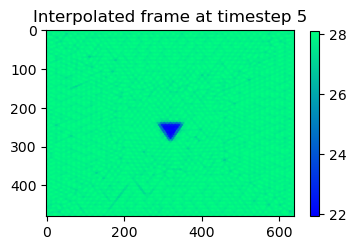

In [56]:
# plot interpolated frame
frame = flattened_temperatures[timestep, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(frame, cmap='winter')
plt.colorbar(shrink=0.8)
plt.title(f"Interpolated frame at timestep {timestep}")
plt.show()